# Estimator varijanse

Pokazaćemo eksperimentalno da estimator $s^2(a)=\frac{\sum_{i=i}^n (x_i - \hat{\mu})^2}{n-a}$ ima matematičko očekivanje $E(s^2(a))=\frac{n-1}{n-a}\sigma^2$. Dakle, za $a=1$ estimator je centriran.

Zelena linija prikazuje pravu varijansu, a crvena aritmetičku sredinu uzoraka estimirane varijanse. 

In [11]:
import ipywidgets as widgets
from scipy.stats import norm, uniform
import matplotlib.pyplot as plt
import numpy as np

def Estimacija_varijanse(n,df):
# n: broj uzoraka za dobijanje jednog uzorka estimatora varijanse
# s: broj eksperimenata - broj uzoraka estimirane varijanse
# df: tip estimatora (parametar a)
#     df=0: deljenje sa n - nije centriran 
#     df=1: deljenje sa n-1 : centriran
# ...
    
    if n>df:
        s = 100000
        X = np.random.normal(0,1,[n,s])  # uzorci iz normalne raspodele
        V = np.var(X,axis=0,ddof=df)
        v = np.mean(V)

        plt.plot([v,v], [0, 3], 'r--', linewidth = 2.0)
        plt.hist(V,bins=60,normed=1);

        plt.plot([1,1], [0, 3], 'g:', linewidth = 2.0)
        plt.ylabel('Histogram', fontsize = 15)
        plt.grid()
        plt.xlim([0,4])
        plt.show()

interactive(children=(IntSlider(value=2, description='n=', min=2), IntSlider(value=0, description='df=', max=5…

<function __main__.Estimacija_varijanse(n, df)>

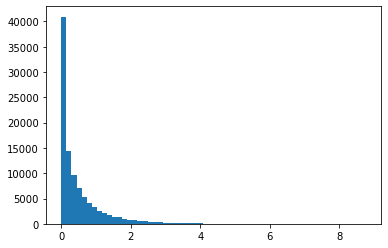

In [12]:
widgets.interact(
    Estimacija_varijanse,
    n = widgets.IntSlider(min=2, max=100,description='n=', step=1, value=2), df=widgets.IntSlider(min=0, max=5,description='df=', step=1, value=0))

## Estimacija standardne devijacije:  $s(a)=\sqrt{\frac{\sum_{i=i}^n (x_i - \hat{\mu})^2}{n-a}}$. Ona nije centrirana ni za $a=-1$ iako estimator varijanse jeste!

In [13]:
def Estimacija_standardne_devijacije(n,df):
# n: broj uzoraka za dobijanje jednog uzorka estimatora varijanse
# s: broj eksperimenata - broj uzoraka estimirane varijanse
# df: tip estimatora (parametar a)
#     df=0: deljenje sa n - nije centriran 
#     df=1: deljenje sa n-1 : centriran
# ...
    
    if n>df:
        s = 100000
        X = np.random.normal(0,1,[n,s])  # uzorci iz normalne raspodele
        V = np.std(X,axis=0,ddof=df)
        v = np.mean(V)

        plt.plot([v,v], [0, 3], 'r--', linewidth = 2.0)
        plt.hist(V,bins=60,normed=1);

        plt.plot([1,1], [0, 3], 'g:', linewidth = 2.0)
        plt.ylabel('Histogram', fontsize = 15)
        plt.grid()
        plt.xlim([0,4])
        plt.show()

interactive(children=(IntSlider(value=2, description='n=', min=2), IntSlider(value=0, description='df=', max=5…

<function __main__.Estimacija_standardne_devijacije(n, df)>

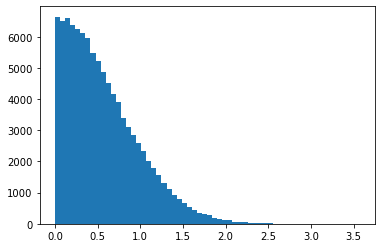

In [14]:
widgets.interact(
    Estimacija_standardne_devijacije,
    n = widgets.IntSlider(min=2, max=100,description='n=', step=1, value=2), df=widgets.IntSlider(min=0, max=5,description='df=', step=1, value=0))

## Konvergencija (stabilnost) estimatora varijanse

In [15]:
def estimacija_varijanse_plot(m,sigma,n,r,df):
# n: broj uzoraka
# r: broj eksperimenata
    
    
    for i in range(r):
        v=[]
        y = np.random.normal(m, sigma, n)
        for k in range(n):
            v=np.append(v,np.var(y[0:k], ddof=df))   # niz estimatora varijanse
        plt.plot(range(1,n+1), v)
        
    
    plt.gcf().set_size_inches(10,5)
    plt.grid()
    plt.show()    

In [16]:
widgets.interact(estimacija_varijanse_plot,
                 m=widgets.FloatSlider(min=-5, max=5,description='Sr.vr.', step=0.5, value=0),
                 sigma=widgets.FloatSlider(min=0.1, max=10,description='Standardna devijacija', step=1, value=1),
                 n=widgets.IntSlider(min=10, max=1000,description='broj uzoraka', step=10, value=100),
                 r=widgets.IntSlider(min=1, max=10,description='broj eksperimenata', step=1, value=5),
                 df=widgets.IntSlider(min=0, max=5,description='df=', step=1, value=0)
)

interactive(children=(FloatSlider(value=0.0, description='Sr.vr.', max=5.0, min=-5.0, step=0.5), FloatSlider(v…

<function __main__.estimacija_varijanse_plot(m, sigma, n, r, df)>

### Vezbanje: nacrtati slicne krive za druge raspodele: npr. Bernulijeva, eksponencijalna, uniformna, Poasonova...

# Intervali poverenja za varijansu

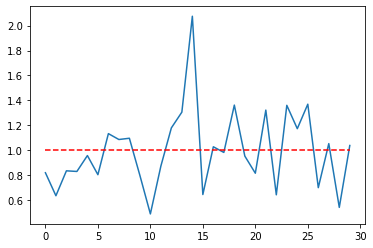

In [18]:
## za Normalnu SP sa matematickim ocekivanjem m i standardnom devijacijom std 

from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

m=0
var=1
std=var**0.5

broj_uzoraka = 20 # broj uzoraka za racunanje jedne ocene varijanse
broj_uz_var=30 # broj uzoraka ocena varijanse


normSP= stats.norm(m,std) # definisanje normalne SP
xs = normSP.rvs(broj_uzoraka*broj_uz_var).reshape(broj_uzoraka,-1) 
uzorci_Var = np.var(xs,axis=0,ddof=1) # uzorci centriranih ocena varijansi 
plt.plot(uzorci_Var)
plt.plot([var]*broj_uz_var,'r--')  # stvarna varijansa - crvena isprekidana linija
plt.show()

In [19]:
# odredjivanje intervala poverenja za prvu ocenu uzorci_Var[0]:

alpha=0.05   # nivo poverenja je 1-alpha=0.95

print(uzorci_Var[0])  # stampamo estimiranu vrednost


Kvantil1 = stats.chi2.ppf(1-alpha/2, df=broj_uzoraka-1)  # Kvantil odgovarajuceg reda hi kvadrat raspodele sa n-1 stepeni slobode
Kvantil2 = stats.chi2.ppf(alpha/2, df=broj_uzoraka-1)  # Kvantil odgovarajuceg reda hi kvadrat raspodele sa n-1 stepeni slobode
   

interval_poverenja = ((broj_uzoraka-1)*uzorci_Var[0]/Kvantil1, (broj_uzoraka-1)*uzorci_Var[0]/Kvantil2)  
print(interval_poverenja)

# Ako je  broj uzoraka dovoljno veliki, moze da se koristi i normalna raspodela:
Kvantil1_n = stats.norm.ppf(1-alpha/2, loc=broj_uzoraka-1, scale=(2*(broj_uzoraka-1))**0.5)  # Kvantil odgovarajuceg reda normalne (n-1,2(n-1)) raspodele
Kvantil2_n = stats.norm.ppf(alpha/2, loc=broj_uzoraka-1, scale=(2*(broj_uzoraka-1))**0.5)               

interval_poverenja1 = ((broj_uzoraka-1)*uzorci_Var[0]/Kvantil1_n, (broj_uzoraka-1)*uzorci_Var[0]/Kvantil2_n)  
print(interval_poverenja1)

0.8206964659905513
(0.4746462227607181, 1.7507667431318785)
(0.5016800105710143, 2.2540183858367464)


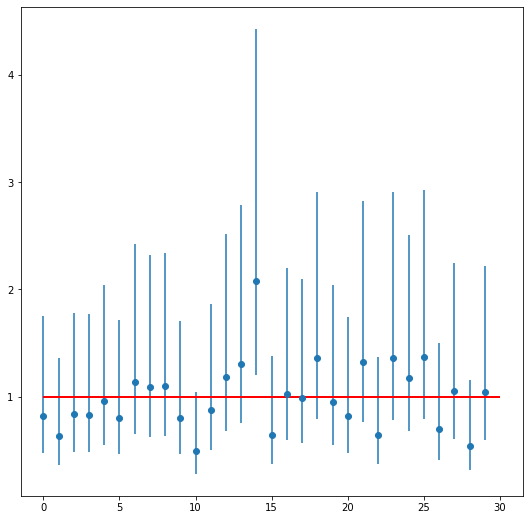

[(0.4746462227607181, 1.7507667431318785), (0.3680708835487191, 1.3576559364238874), (0.48349322371798353, 1.7833995426985665), (0.4806212843240249, 1.7728061876098273), (0.5542239711598794, 2.0442949936680757), (0.46558817487503484, 1.7173554817850352), (0.6558895927264982, 2.419295953590173), (0.628643286374007, 2.318795992255451), (0.6344659113641438, 2.340273163465552), (0.4625223580569117, 1.706046995867914), (0.28381285847628657, 1.0468641486355463), (0.5053240136829051, 1.8639239821949491), (0.6824676839594059, 2.5173311553786806), (0.7554286358295662, 2.786452875843563), (1.1998887602539994, 4.425876023392424), (0.37367442306721216, 1.3783249951087777), (0.5949490816081145, 2.1945124937009095), (0.568713683604703, 2.097741340545948), (0.7881105550109198, 2.9070024861862604), (0.5518275811338994, 2.035455736638585), (0.4724178936362753, 1.7425473908295777), (0.7649162143550726, 2.8214484918598366), (0.372367620912091, 1.3735047613360707), (0.7870434738974142, 2.903066480723321),

In [20]:
# za svaku ocenu dobijamo odgovarajuci interval poverenja:

intervali_poverenja=[]
for i in range(0,broj_uz_var):
    intervali_poverenja.append(((broj_uzoraka-1)*uzorci_Var[i]/Kvantil1, (broj_uzoraka-1)*uzorci_Var[i]/Kvantil2))
    
# crtanje intervala poverenja:

plt.figure(figsize=(9,9))

# crtamo intervale pomocu plt.errorbar:
plt.errorbar(x=np.arange(0, broj_uz_var), 
             y=uzorci_Var[0:broj_uz_var], 
             yerr=np.stack((uzorci_Var-np.array(intervali_poverenja)[:,0], np.array(intervali_poverenja)[:,1]-uzorci_Var)),
             fmt='o')

plt.hlines(xmin=0, xmax=broj_uz_var,
           y=var, 
           linewidth=2.0,
           color="red")

plt.show()
print(intervali_poverenja)

In [21]:
# Intervali poverenje za varijansu nisu simetricni!!

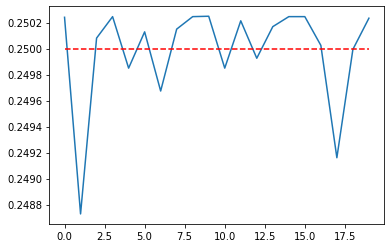

In [22]:
## za Bernulijevu SP - matematicko ocekivanje je verovatnoca uspeha p, varijansa je p(1-p) 
## Pokazacemo da u ovom slucaju intervali poverenja ne vaze (egzaktno vaze samo za uzorke iz normalne raspodele)


from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

p=0.5
var=p*(1-p)
std=var**0.5

broj_uzoraka = 1000 # broj uzoraka za racunanje jedne ocene varijanse
broj_uz_var=20 # broj uzoraka ocena varijanse


b= stats.bernoulli(p) # verovatnoca uspeha je p
xs = b.rvs(broj_uzoraka*broj_uz_var).reshape(broj_uzoraka,-1) 
uzorci_Var = np.var(xs,axis=0,ddof=1) # uzorci centriranih ocena varijansi 
plt.plot(uzorci_Var)
plt.plot([var]*broj_uz_var,'r--')  # stvarna varijansa - crvena isprekidana linija
plt.show()

In [12]:
# odredjivanje intervala poverenja za prvu ocenu uzorci_Var[0]:


alpha=0.05   # nivo poverenja je 1-alpha=0.95

print(uzorci_Var[0])  # stampamo estimiranu vrednost


Kvantil1 = stats.chi2.ppf(1-alpha/2, df=broj_uzoraka-1)  # Kvantil odgovarajuceg reda hi kvadrat raspodele sa n-1 stepeni slobode
Kvantil2 = stats.chi2.ppf(alpha/2, df=broj_uzoraka-1)  # Kvantil odgovarajuceg reda hi kvadrat raspodele sa n-1 stepeni slobode
   

interval_poverenja = ((broj_uzoraka-1)*uzorci_Var[0]/Kvantil1, (broj_uzoraka-1)*uzorci_Var[0]/Kvantil2)  
print(interval_poverenja)

# Posto je  broj uzoraka dovoljno veliki, moze da se koristi i normalna raspodela:
Kvantil1_n = stats.norm.ppf(1-alpha/2, loc=broj_uzoraka-1, scale=(2*(broj_uzoraka-1))**0.5)  # Kvantil odgovarajuceg reda normalne (n-1,2(n-1)) raspodele
Kvantil2_n = stats.norm.ppf(alpha/2, loc=broj_uzoraka-1, scale=(2*(broj_uzoraka-1))**0.5)               

interval_poverenja1 = ((broj_uzoraka-1)*uzorci_Var[0]/Kvantil1_n, (broj_uzoraka-1)*uzorci_Var[0]/Kvantil2_n)  
print(interval_poverenja1)


0.249808808809
(0.22927144235289962, 0.27324945495948227)
(0.22966783259070911, 0.2738219275297058)


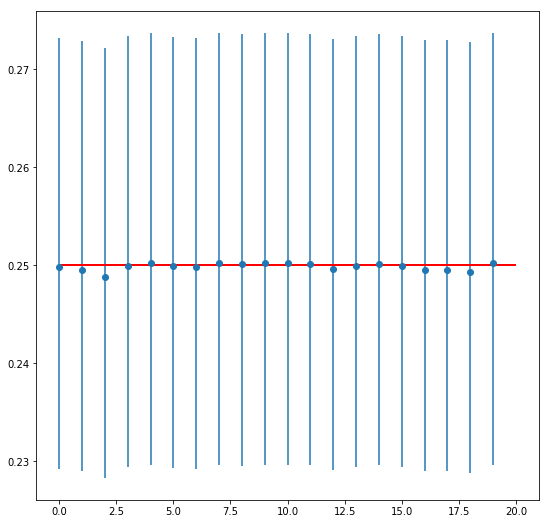

In [13]:

intervali_poverenja=[]
for i in range(0,broj_uz_var):
    intervali_poverenja.append(((broj_uzoraka-1)*uzorci_Var[i]/Kvantil1, (broj_uzoraka-1)*uzorci_Var[i]/Kvantil2))
    
# crtanje intervala poverenja:

plt.figure(figsize=(9,9))

# crtamo intervale pomocu plt.errorbar:
plt.errorbar(x=np.arange(0, broj_uz_var), 
             y=uzorci_Var[0:broj_uz_var], 
             yerr=np.stack((uzorci_Var-np.array(intervali_poverenja)[:,0], np.array(intervali_poverenja)[:,1]-uzorci_Var)),
             fmt='o')

plt.hlines(xmin=0, xmax=broj_uz_var,
           y=var, 
           linewidth=2.0,
           color="red")

plt.show()

In [14]:
# Previse su siroki intervali poverenja (nezavisno od n) 
# Za malu vrednost verovatnoce uspeha p dobiju se previse uski intervali poverenja.

# problem je u racunanju varijanse kvadrirane normalizovane SP:
# Za p=0.5 varijansa je 0 (a za pirmenu formule za intervale poverenja treba buda bude 2!):
np.var((xs-p)**2/(p*(1-p)),axis=0,ddof=1)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [15]:
# Za p=0.1 varijansa je puno veca od 2:
p=0.1
b= stats.bernoulli(p) # verovatnoca uspeha je p
xs = b.rvs(broj_uzoraka*broj_uz_var).reshape(broj_uzoraka,-1) 
np.var((xs-p)**2/(p*(1-p)),axis=0,ddof=1)

array([ 6.67144181,  7.11822934,  6.60698229,  5.88748749,  6.92769807,
        7.4326178 ,  7.55726591,  6.4775887 ,  7.49502095,  6.67144181,
        7.30733697,  7.11822934,  7.98855151,  6.79988631,  7.1814234 ,
        7.1814234 ,  6.15133652,  7.1814234 ,  7.80466392,  6.79988631])

In [16]:
# Za p oko 0.21 varijansa je oko 2, pa intervali vaze:
p=0.21
b= stats.bernoulli(p) # verovatnoca uspeha je p
xs = b.rvs(broj_uzoraka*broj_uz_var).reshape(broj_uzoraka,-1) 
np.var((xs-p)**2/(p*(1-p)),axis=0,ddof=1)

array([ 1.91308602,  2.00117676,  1.9649005 ,  2.05794634,  2.05093578,
        2.05794634,  2.00117676,  2.1733819 ,  2.05093578,  2.11994019,
        2.0083586 ,  2.09263206,  1.82924077,  2.179952  ,  2.13344744,
        2.04390076,  1.97948441,  2.05794634,  2.04390076,  1.86771929])

### Vezbanje 1: Uraditi isto kada uzorke uzimamo iz eksponencijalne i uniformne raspodele.

### Vezbanje 2: Ucitati podatke o temperaturi iz fajla temeprature.csv, izabrati grad, estimirati varijansu temperatura, i odrediti 90%, 95% i 99% intervale poverenja.

## Estimacija varijanse populacije iz uzorka

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

atributi = ['Detroit'] # uzimamo grad Detroit
df = pd.read_csv("temperature.csv",usecols=atributi)
df.head()
#df.shape

Detroit
0         NaN
1  284.030000
2  284.069789
3  284.173965
4  284.278140

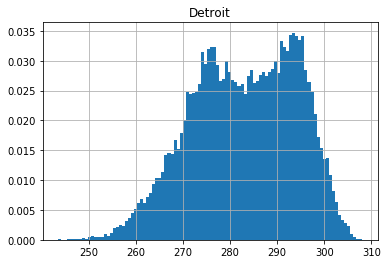

In [18]:
#histogram
hist = df.hist(normed=True,bins=100) 
plt.show()

In [19]:
df.describe() # ovom naredbom pandas automatski izracuna karakteristicne velicine na celoj populaciji

Detroit
count  45252.000000
mean     282.971668
std       11.034481
min      243.483333
25%      274.690000
50%      283.540000
75%      292.231250
max      308.050000

In [20]:
uzorak=df.sample(10)
uzorak.std()['Detroit']  # ddof=1 po default-u kod Pandas Data Frame-a (kod numpy je ddof=0 po default-u)

9.9472269186759981

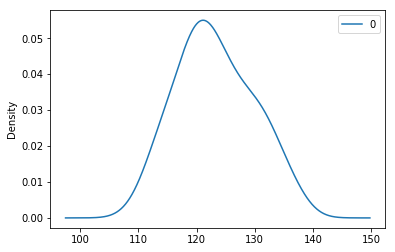

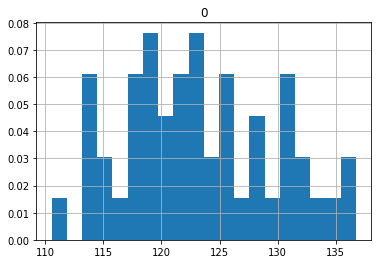

In [21]:
# hocemo da estimiramo varijansu uzimajuci samo manji uzorak iz cele populacije:
estimatori_varijanse = []       

velicina_uzorka=500
broj_estimacija_varijansi=50   # ovo je broj estimacija, svaki je baziran na uzorku velicine 'velicina_uzorka'
for x in range(broj_estimacija_varijansi):         # Generate 200 samples
    
    uzorak=df.sample(velicina_uzorka)
    estimatori_varijanse.append( uzorak.var()['Detroit'] )
    
    # ili:
    #uzorak = np.random.choice(a= df.values, size=velicina_uzorka)
    #estimatori_varijanse.append( uzorak.var(ddof=1) )
    
# plotujemo estimaciju gustine verovatnoce raspodele ocena varijansi (pomocu histograma) - vidimo da je priblizno normalna!  
pd.DataFrame(estimatori_varijanse).plot(kind="density")   

# histogram ocena varijansi:
hist = pd.DataFrame(estimatori_varijanse).hist(normed=True,bins=20) 
plt.show()

In [22]:
# intervali poverenja:

alpha=0.05   # nivo poverenja je 1-alpha=0.95

print(estimatori_varijanse[0])  # stampamo estimiranu vrednost


Kvantil1 = stats.chi2.ppf(1-alpha/2, df=velicina_uzorka-1)  # Kvantil odgovarajuceg reda hi kvadrat raspodele sa n-1 stepeni slobode
Kvantil2 = stats.chi2.ppf(alpha/2, df=velicina_uzorka-1)  # Kvantil odgovarajuceg reda hi kvadrat raspodele sa n-1 stepeni slobode
   

interval_poverenja = ((velicina_uzorka-1)*estimatori_varijanse[0]/Kvantil1, (velicina_uzorka-1)*estimatori_varijanse[0]/Kvantil2)  
print(interval_poverenja)


119.695985453
(106.12901833822265, 136.05595854677298)


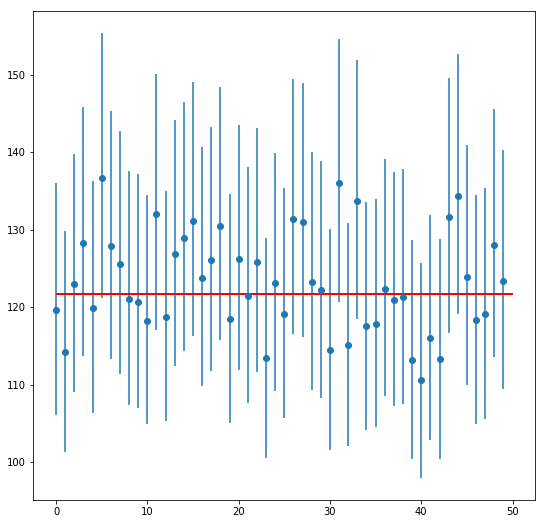

In [23]:
#crtanje svih intervala poverenja
intervali_poverenja=[]
for i in range(0,broj_estimacija_varijansi):
    intervali_poverenja.append(((velicina_uzorka-1)*estimatori_varijanse[i]/Kvantil1, (velicina_uzorka-1)*estimatori_varijanse[i]/Kvantil2))
    
# crtanje intervala poverenja:

plt.figure(figsize=(9,9))

# crtamo intervale pomocu plt.errorbar:
plt.errorbar(x=np.arange(0, broj_estimacija_varijansi), 
             y=estimatori_varijanse[0:broj_estimacija_varijansi], 
             yerr=np.stack((estimatori_varijanse-np.array(intervali_poverenja)[:,0], np.array(intervali_poverenja)[:,1]-estimatori_varijanse)),
             fmt='o')

plt.hlines(xmin=0, xmax=broj_estimacija_varijansi,
           y=df.var()['Detroit'], 
           linewidth=2.0,
           color="red")

plt.show()